# Collaboration Patterns By Year (International, Domestic, Internal)

Using the count capability of the API, Dimensions allows you to quickly identify international, domestic, and inernal Collaboration

This notebook shows how to quickly identify international, domestic, and internal collaboration using the [Organizations data source](https://docs.dimensions.ai/dsl/datasource-organizations.html) and the [Publications data source](https://docs.dimensions.ai/dsl/datasource-publications.html) available via the [Dimensions Analytics API](https://docs.dimensions.ai/dsl/). 


## Prerequisites

Please install the latest versions of these libraries to run this notebook. 

In [1]:
!pip install dimcli plotly -U --quiet 

#
# load libraries
import dimcli
from dimcli.utils import *

import json, sys, time
import pandas as pd
import plotly.express as px  # plotly>=4.8.1
if not 'google.colab' in sys.modules:
  # make js dependecies local / needed by html exports
  from plotly.offline import init_notebook_mode
  init_notebook_mode(connected=True)

print("==\nLogging in..")
# https://digital-science.github.io/dimcli/getting-started.html#authentication
ENDPOINT = "https://app.dimensions.ai"
if 'google.colab' in sys.modules:
  import getpass
  KEY = getpass.getpass(prompt='API Key: ')  
  dimcli.login(key=KEY, endpoint=ENDPOINT)
else:
  KEY = ""
  dimcli.login(key=KEY, endpoint=ENDPOINT)
dsl = dimcli.Dsl()

==
Logging in..
Dimcli - Dimensions API Client (v0.9)
Connected to: https://app.dimensions.ai - DSL v1.31
Method: dsl.ini file


## 1. Lookup the University that you are interested in

In [2]:
dsl.query("""
search organizations for "melbourne" return organizations
""").as_dataframe()

Returned Organizations: 15 (total = 15)
Time: 1.95s


name   longitude acronym  \
0                                      RMIT Europe    2.194333    RMIT   
1                   Melbourne Sexual Health Centre  144.963840    MSHC   
2                                 Melbourne Clinic  144.999650     NaN   
3                                   Ridley College  144.957660     NaN   
4                     Melbourne School of Theology  145.209410     MBI   
5                    Port of Melbourne Corporation  144.907070    PoMC   
6                                  Melbourne Water  144.946700     NaN   
7   Victorian Life Sciences Computation Initiative  144.964460     NaN   
8                        Melbourne Free University         NaN     NaN   
9               Royal Dental Hospital of Melbourne  144.964630    RDHM   
10                                Melbourne Health  144.955930     NaN   
11                        Royal Melbourne Hospital  144.955930     RMH   
12            Melbourne Centre for Nanofabrication  145.143660     MCN   
13                                 RMIT University  144.962570    RMIT   
14                         University of Melbourne  144.959980     NaN   

                                              linkout country_name  city_name  \
0                               [https://www.rmit.eu]        Spain  Barcelona   
1                          [https://www.mshc.org.au/]    Australia    Carlton   
2             [http://www.themelbourneclinic.com.au/]    Australia   Richmond   
3                        [https://www.ridley.edu.au/]    Australia  Melbourne   
4                            [http://www.mst.edu.au/]    Australia  Melbourne   
5                   [http://www.portofmelbourne.com/]    Australia  Melbourne   
6   [http://www.melbournewater.com.au/Pages/home.a...    Australia  Melbourne   
7                         [https://www.vlsci.org.au/]    Australia  Melbourne   
8                                                 NaN    Australia  Melbourne   
9                           [https://www.dhsv.org.au]    Australia  Melbourne   
10                            [http://www.mh.org.au/]    Australia  Melbourne   
11                        [http://www.rmh.mh.org.au/]    Australia  Melbourne   
12                        [http://nanomelbourne.com/]    Australia    Clayton   
13                         [https://www.rmit.edu.au/]    Australia  Melbourne   
14                       [http://www.unimelb.edu.au/]    Australia  Melbourne   

           types             id   latitude state_name  
0    [Education]  grid.493437.e  41.402576        NaN  
1   [Healthcare]  grid.490309.7 -37.803123   Victoria  
2   [Healthcare]  grid.477970.a -37.815063   Victoria  
3    [Education]  grid.469061.c -37.783780   Victoria  
4    [Education]  grid.469026.f -37.859700   Victoria  
5   [Government]  grid.468079.4 -37.824028   Victoria  
6   [Government]  grid.468069.5 -37.814007   Victoria  
7    [Education]  grid.452643.2 -37.799847   Victoria  
8    [Education]  grid.449135.e        NaN   Victoria  
9   [Healthcare]  grid.440113.3 -37.799260   Victoria  
10  [Healthcare]  grid.429299.d -37.798940   Victoria  
11  [Healthcare]  grid.416153.4 -37.798756   Victoria  
12    [Facility]  grid.410660.5 -37.915775   Victoria  
13   [Education]    grid.1017.7 -37.806747   Victoria  
14   [Education]    grid.1008.9 -37.797115   Victoria

In [3]:
institution = "grid.1008.9"

## 2. Publications output by year

Returned Year: 11
Time: 5.44s


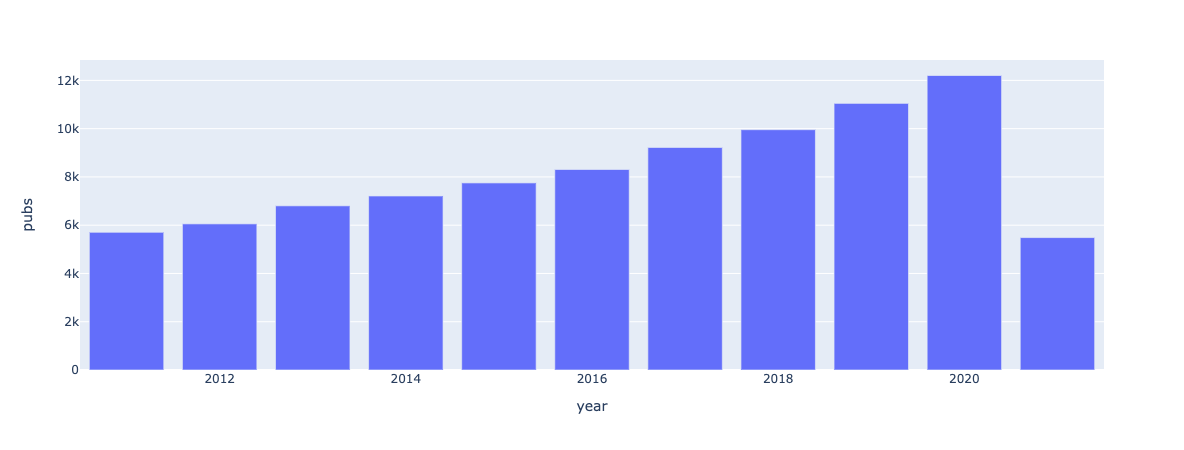

In [4]:
allpubs = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and year > 2010
        return year
    
    
    """).as_dataframe()

allpubs.columns = ['year', 'pubs']
px.bar(allpubs, x="year", y="pubs")

## 3. International publications

Returned Year: 11
Time: 0.54s


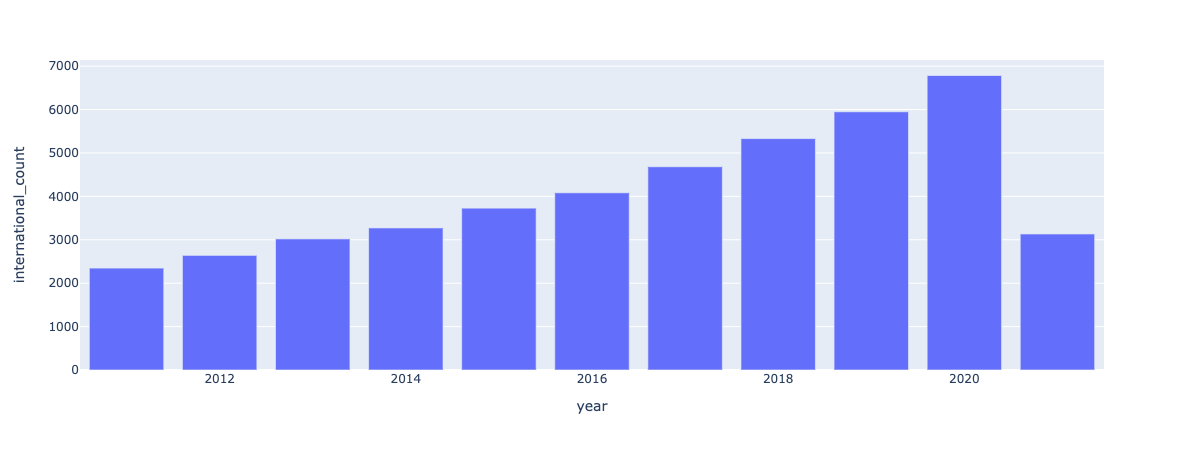

In [5]:
international = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) > 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

international.columns = ['year', 'international_count']
px.bar(international, x="year", y="international_count")

## 4. Domestic

Returned Year: 11
Time: 0.66s


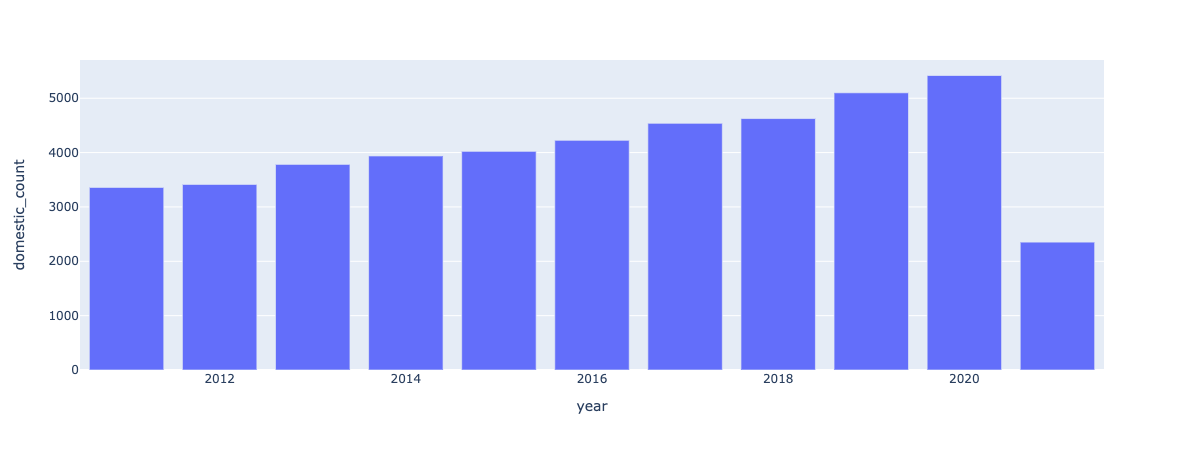

In [6]:
domestic = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

domestic.columns = ['year', 'domestic_count']
px.bar(domestic, x="year", y="domestic_count")

## 5. Internal

Returned Year: 11
Time: 0.59s


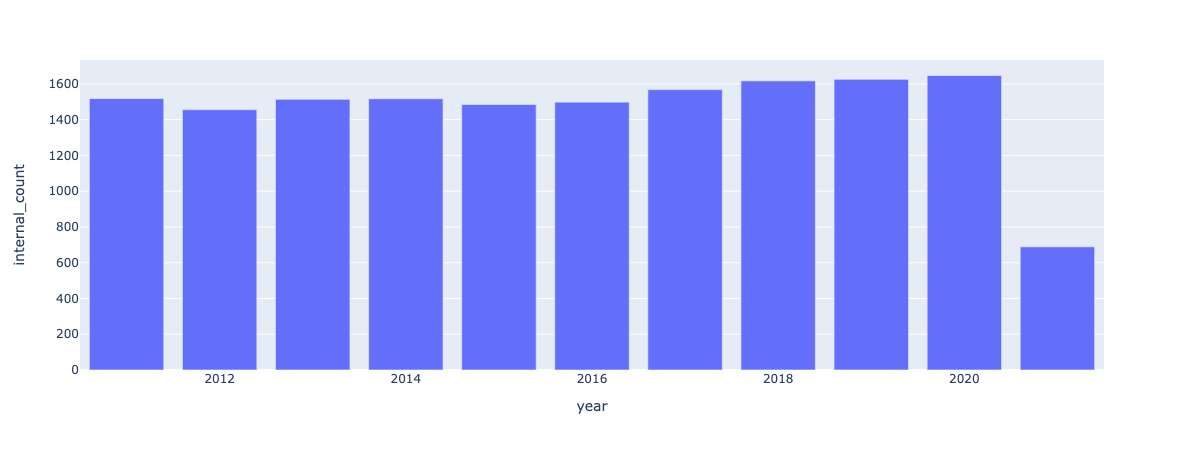

In [7]:
internal = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_orgs) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

internal.columns = ['year', 'internal_count']
px.bar(internal, x="year", y="internal_count")

## 6. Joining up All metrics together 

In [8]:
jdf = allpubs.set_index('year'). \
      join(international.set_index('year')). \
      join(domestic.set_index('year')). \
      join(internal.set_index('year')) 

jdf

pubs  international_count  domestic_count  internal_count
year                                                            
2020  12202                 6784            5418            1647
2019  11048                 5948            5100            1626
2018   9957                 5331            4626            1617
2017   9221                 4682            4539            1568
2016   8308                 4082            4226            1498
2015   7752                 3729            4023            1485
2014   7211                 3273            3938            1517
2013   6803                 3020            3783            1514
2012   6055                 2641            3414            1456
2011   5707                 2348            3359            1518
2021   5487                 3134            2353             689

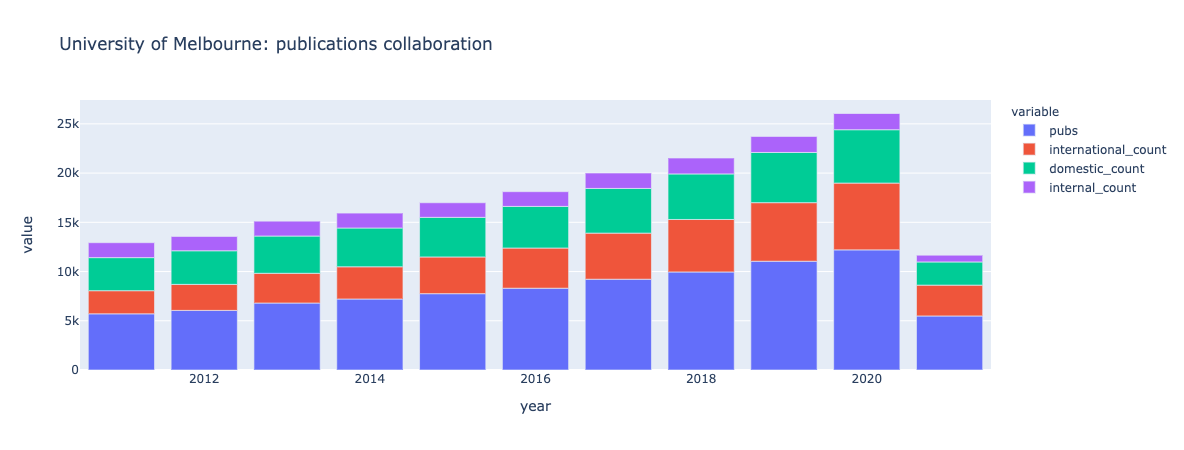

In [9]:
px.bar(jdf, title="University of Melbourne: publications collaboration")

## 7. How does this compare to Australia?

Returned Year: 11
Time: 0.76s
Returned Year: 11
Time: 0.74s
Returned Year: 11
Time: 0.70s
Returned Year: 11
Time: 0.74s


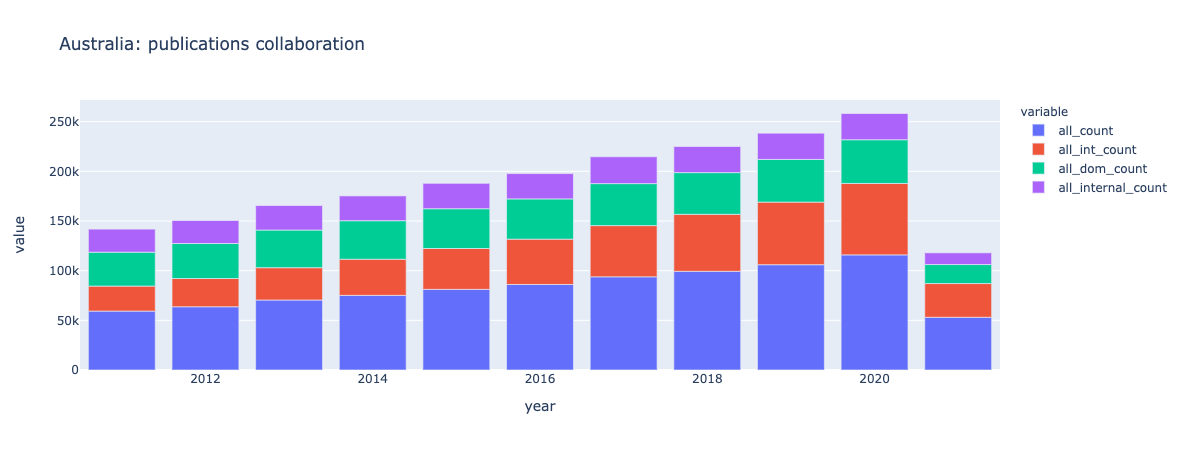

In [10]:
auallpubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
        return year
        
    """).as_dataframe()

auallpubs.columns = ['year', 'all_count']

auintpubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
            and count(research_org_countries) > 1
        return year
        
    """).as_dataframe()

auintpubs.columns = ['year', 'all_int_count']


audompubs = dsl.query("""
    
        search publications 
            where research_org_countries.name= "Australia"
            and type="article"
            and year > 2010
            and count(research_org_countries) = 1
        return year
        
    """).as_dataframe()

audompubs.columns = ['year', 'all_dom_count']

auinternalpubs = dsl.query("""
    
        search publications 
            where 
            research_org_countries.name= "Australia"
            and count(research_orgs) = 1
            and type="article"
            and year > 2010
        return year
        
    """).as_dataframe()

auinternalpubs.columns = ['year', 'all_internal_count']

audf = auallpubs.set_index('year'). \
      join(auintpubs.set_index('year')). \
      join(audompubs.set_index('year')). \
      join(auinternalpubs.set_index('year')). \
      sort_values(by=['year'])

px.bar(audf, title="Australia: publications collaboration")

## 8. How does this compare to a different Institution  (University of Toronto)?

Returned Year: 11
Time: 0.64s
Returned Year: 11
Time: 0.56s
Returned Year: 11
Time: 0.59s
Returned Year: 11
Time: 0.59s


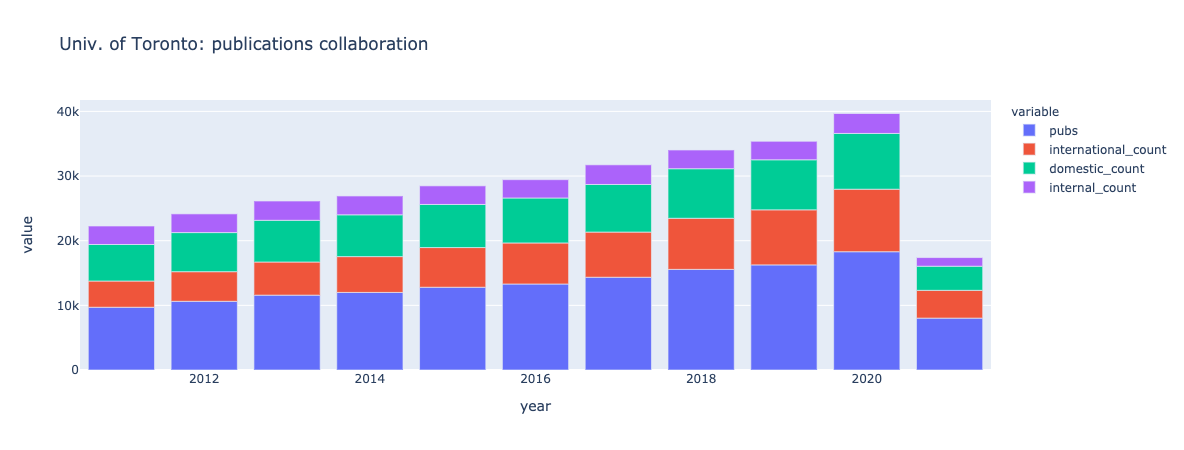

In [11]:
institution = "grid.17063.33"

allpubs = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and year > 2010
        return year
    
    
    """).as_dataframe()

allpubs.columns = ['year', 'pubs']



international = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) > 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

international.columns = ['year', 'international_count']


domestic = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_org_countries) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

domestic.columns = ['year', 'domestic_count']

internal = dsl.query(f"""
    
        search publications 
            where research_orgs.id = "{institution}"
            and type="article"
            and count(research_orgs) = 1
                 and year > 2010
        return year
    
    
    """).as_dataframe()

internal.columns = ['year', 'internal_count']


jdf = allpubs.set_index('year'). \
      join(international.set_index('year')). \
      join(domestic.set_index('year')). \
      join(internal.set_index('year')) 

px.bar(jdf, title="Univ. of Toronto: publications collaboration")


---
## Want to learn more?

Check out the [Dimensions API Lab](https://api-lab.dimensions.ai/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 